In [76]:
# Import des paquets requis
import sys
sys.path.append('/opt/rosssh mecbot@cpr-ets05-0X/noetic/lib/python3/dist-packages/')
sys.path.append('/usr/lib/python3/dist-packages')
sys.path.append('/opt/ros/noetic/lib/python3/dist-packages/')
from scipy.spatial.transform import Rotation as R
from nav_msgs.msg import Odometry
import numpy, math
import rosbag

In [77]:
# Fonction pour le calcul de l'orientation à partir d'un quaternion
def get_heading_from_quaternion(q):
    r = R.from_quat([q.x, q.y, q.z, q.w])
    angles = r.as_euler('xyz', degrees=False)
    return angles[2]

In [78]:
# Boucle pour lire l'ensemble du ROSBAG et extraire seulement les positions x/y
x, y, theta, x_gt, y_gt, theta_gt = [], [], [], [], [], []
with rosbag.Bag("project2.bag", 'r') as in_bag:
    for topic, msg, t in in_bag.read_messages():
        if topic=='/ground_truth':
            x_gt.append(msg.pose.pose.position.x)
            y_gt.append(msg.pose.pose.position.y)
            theta_gt.append(get_heading_from_quaternion(msg.pose.pose.orientation))
        if topic=='/filter':
            x.append(msg.pose.pose.position.x)
            y.append(msg.pose.pose.position.y)
            theta.append(get_heading_from_quaternion(msg.pose.pose.orientation))

In [79]:
import matplotlib.pyplot as plt
    
def plot_track(xs, label='Ground Truth', c='k', lw=2):
    plt.plot(xs, color=c, lw=2, ls=':', label=label)

def plot_filter(xs, ys=None, c='C0', label='Filter', var=None):
    plt.plot(xs, color=c, label=label)
    
def plot_data(ground_truth, filter_data, std_scale=1,
               y_lim=None,
               xlabel='time', ylabel='position',
               title='Kalman Filter'):
    
    plot_track(ground_truth)
    plot_filter(filter_data)
    
    plt.legend(loc=4)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    y_max = max(max(ground_truth), max(filter_data))
    y_min = min(min(ground_truth), min(filter_data))

    plt.ylim((y_min-5, y_max+5))

    plt.title(title)
    plt.show()

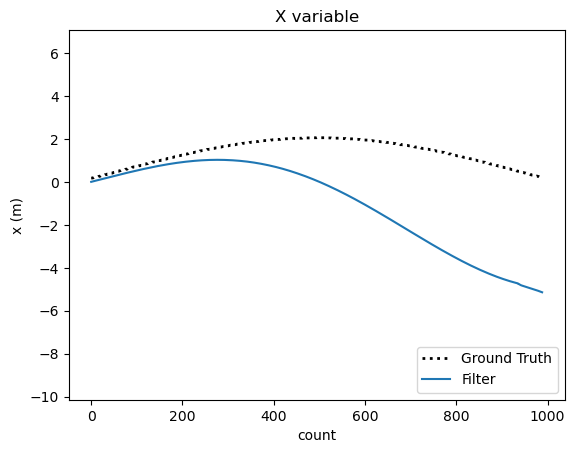

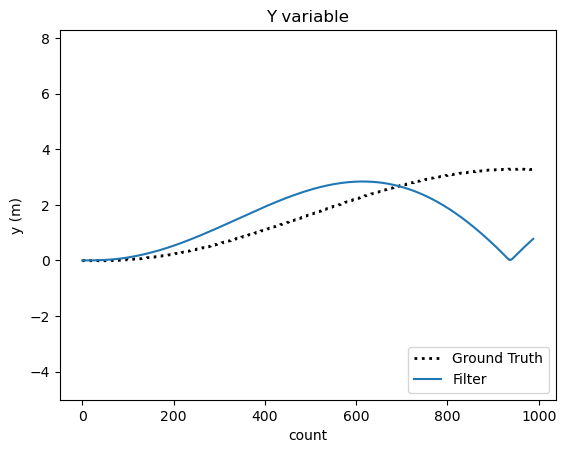

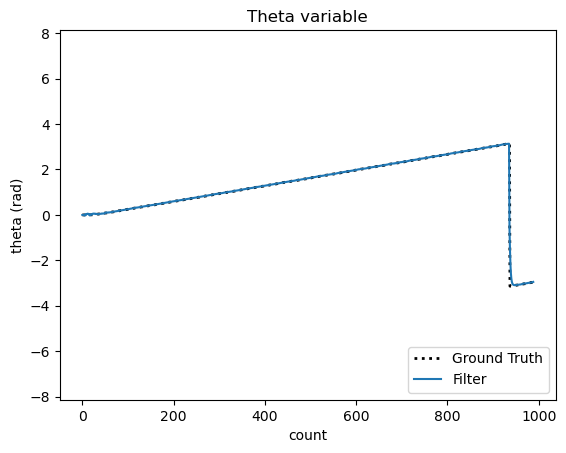

In [80]:
plot_data(x_gt, x, xlabel='count', ylabel='x (m)', title='X variable')
plot_data(y_gt, y, xlabel='count', ylabel='y (m)', title='Y variable')
plot_data(theta_gt, theta, xlabel='count', ylabel='theta (rad)', title='Theta variable')